In [37]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df = pd.read_csv("/Users/sujitharajan/Documents/GitHub/IS460/data/df_prepared.csv")


In [38]:
df.drop(columns=df.columns[0], axis = 1, inplace =True)
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295689 entries, 0 to 295688
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           295689 non-null  float64
 1   source_city       295689 non-null  float64
 2   departure_time    295689 non-null  float64
 3   stops             295689 non-null  float64
 4   arrival_time      295689 non-null  float64
 5   destination_city  295689 non-null  float64
 6   class             295689 non-null  float64
 7   days_left_binned  295689 non-null  float64
 8   duration_sqrt     295689 non-null  float64
 9   price             295689 non-null  float64
dtypes: float64(10)
memory usage: 22.6 MB


In [39]:
df['log_price'] = np.log(df['price'])

In [40]:
X = df.drop('price', axis=1)
y = df['log_price']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



In [41]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LS2TM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')



In [42]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 130, batch_size = 32)

Epoch 1/130
7393/7393 [==============================] - 51s 7ms/step - loss: 0.8167
Epoch 2/130
7393/7393 [==============================] - 48s 7ms/step - loss: 0.2914
Epoch 3/130
7393/7393 [==============================] - 48s 7ms/step - loss: 0.1619
Epoch 4/130
7393/7393 [==============================] - 48s 6ms/step - loss: 0.0795
Epoch 5/130
7393/7393 [==============================] - 48s 6ms/step - loss: 0.0364
Epoch 6/130
7393/7393 [==============================] - 48s 7ms/step - loss: 0.0232
Epoch 7/130
7393/7393 [==============================] - 48s 7ms/step - loss: 0.0184
Epoch 8/130
7393/7393 [==============================] - 48s 7ms/step - loss: 0.0151
Epoch 9/130
7393/7393 [==============================] - 48s 7ms/step - loss: 0.0136
Epoch 10/130
7393/7393 [==============================] - 48s 7ms/step - loss: 0.0130
Epoch 11/130
7393/7393 [==============================] - 48s 7ms/step - loss: 0.0122
Epoch 12/130
7393/7393 [==============================] - 48s 7

KeyboardInterrupt: 

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price = model.predict(X_test)
predicted_price

1849/1849 [==============================] - 4s 2ms/step


array([[ 9.298796],
       [ 9.196624],
       [10.300833],
       ...,
       [10.653801],
       [ 9.036491],
       [ 9.505176]], dtype=float32)

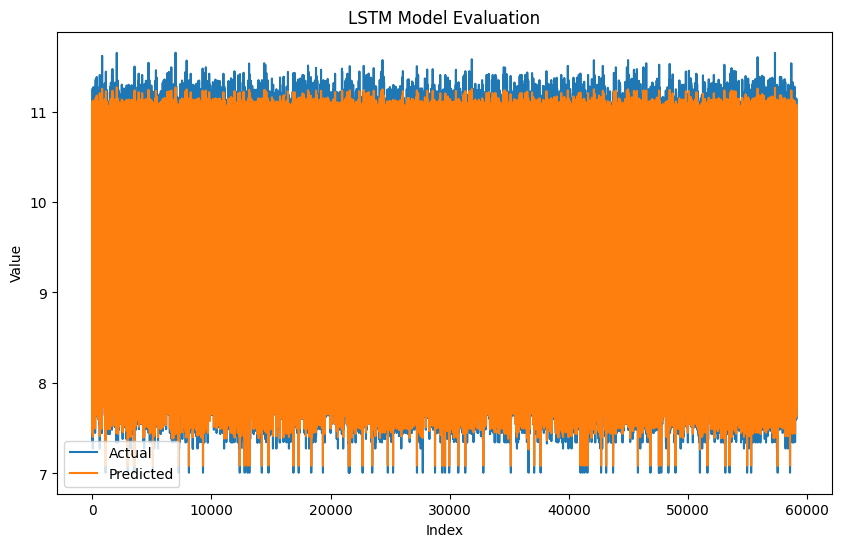

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predicted_price, label='Predicted')
plt.xlabel('Index')  # Use index as the x-axis label
plt.ylabel('Value')
plt.title('LSTM Model Evaluation')
plt.legend()
plt.show()

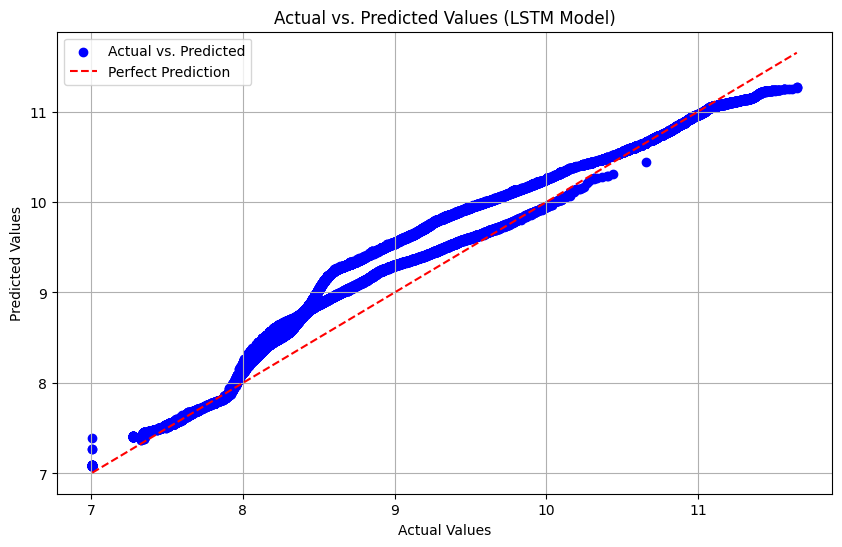

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_price, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (LSTM Model)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
mse = mean_squared_error(np.exp(y_test), np.exp(predicted_price))
r2 = r2_score(np.exp(y_test), np.exp(predicted_price))
mape = mean_absolute_percentage_error(np.exp(y_test), np.exp(predicted_price))
n = len(y_test) 
p = X_test.shape[1] 
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
rmse = np.sqrt(mse)


In [ ]:
lstm_results = pd.DataFrame(['LSTM', mse, r2, mape, adjusted_r2, rmse ]).transpose()
lstm_results.columns = ['Method', 'MSE', 'R2', 'MAPE','Adjusted R2', 'RMSE']
lstm_results

,Method,MSE,R2,MAPE,Adjusted R2,RMSE
0,LSTM,14332156.336568,0.97194,0.335385,0.971935,3785.783451
